In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn.model_selection
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

#word2vec
from gensim.models import Word2Vec  
import gensim
import string

Using TensorFlow backend.
[nltk_data] Downloading package wordnet to /home/typedoor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
PATH = '/home/typedoor/PLBRS/Data/'

In [3]:
sp = pd.read_csv(PATH + 'south_park.csv')

In [7]:
sp_clean = sp[(sp.Character == 'Cartman') | (sp.Character == 'Kyle') | (sp.Character == 'Stan') | (sp.Character == 'Butters') | (sp.Character == 'Randy')].reset_index(drop = True)
sp_clean.shape  

(29622, 4)

In [8]:
sp_copy = sp_clean.copy()[['Character', 'Line']]
sp_copy.Line = sp_copy.Line.apply(sent_tokenize)
sp_copy.Line[0]

['You guys, you guys!', 'Chef is going away.']

In [9]:
def break_up_to_sentences(df):
    result_df = pd.DataFrame(columns = ['Character', 'Line'])
    
    for index, row in df.iterrows():
        if index %1000 == 0:
                print(index)
        
        for sentence in row.Line:

            addition = {'Character': row.Character,'Line': sentence }
            result_df = result_df.append(addition, ignore_index = True)
    
    return result_df
full_df = break_up_to_sentences(sp_copy) 
full_df

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000


,Character,Line
0,Stan,"You guys, you guys!"
1,Stan,Chef is going away.
2,Kyle,Going away?
3,Kyle,For how long?
4,Stan,Forever.
5,Stan,"Chef said he's been bored, so he joining a gro..."
6,Cartman,I'm gonna miss him.
7,Cartman,I'm gonna miss Chef and I...and I don't know h...
8,Stan,"Dude, how are we gonna go on?"
9,Stan,Chef was our fuh...f-ffriend.


In [10]:
full_df.groupby('Character').count().Line[sp.groupby('Character').count().Line > 2000]

Character
Butters     5041
Cartman    21122
Kyle       11517
Randy       5284
Stan       11847
Name: Line, dtype: int64

In [26]:
working_df = full_df[(full_df.Character == 'Cartman') | (full_df.Character == 'Kyle') | (full_df.Character == 'Stan')].reset_index(drop = True)
indices = working_df[(working_df.Line == '!') | (working_df.Line == '?')].index
final_df = working_df.drop(index = indices).reset_index(drop = True)


In [23]:
final_df

,index,Character,Line
0,0,Stan,"You guys, you guys!"
1,1,Stan,Chef is going away.
2,2,Kyle,Going away?
3,3,Kyle,For how long?
4,4,Stan,Forever.
5,5,Stan,"Chef said he's been bored, so he joining a gro..."
6,6,Cartman,I'm gonna miss him.
7,7,Cartman,I'm gonna miss Chef and I...and I don't know h...
8,8,Stan,"Dude, how are we gonna go on?"
9,9,Stan,Chef was our fuh...f-ffriend.


In [27]:
final_df.to_csv(PATH + 'south_park_sentence_by_sentence.csv', index = False)

In [28]:
simpsons = pd.read_csv(PATH+ 'simpsons.csv')
simpsons.head()

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...


In [33]:
simpsons.groupby('raw_character_text').count().spoken_words[simpsons.groupby('raw_character_text').count().spoken_words > 2000]

raw_character_text
Bart Simpson           12995
C. Montgomery Burns     3077
Homer Simpson          27850
Lisa Simpson           10756
Marge Simpson          13172
Moe Szyslak             2808
Ned Flanders            2056
Seymour Skinner         2385
Name: spoken_words, dtype: int64

In [55]:
simpsons.rename(columns = {'raw_character_text': 'Character','spoken_words' : 'Line'}, inplace = True)
simpsons_family = simpsons[(simpsons.Character == 'Bart Simpson') | (simpsons.Character == 'Marge Simpson') | (simpsons.Character == 'Homer Simpson') | (simpsons.Character == 'Lisa Simpson')].reset_index(drop = True)
simpsons_family.dropna(inplace = True)
simpsons_family.head(25)

,Character,Line
0,Lisa Simpson,Where's Mr. Bergstrom?
1,Lisa Simpson,That life is worth living.
2,Bart Simpson,Victory party under the slide!
3,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!
4,Lisa Simpson,Do you know where I could find him?
5,Lisa Simpson,"The train, how like him... traditional, yet en..."
6,Lisa Simpson,"I see he touched you, too."
7,Bart Simpson,"Hey, thanks for your vote, man."
8,Bart Simpson,"Well, you got that right. Thanks for your vote..."
9,Bart Simpson,"Well, don't sweat it. Just so long as a couple..."


In [57]:
set(simpsons_family.Character)

{'Bart Simpson', 'Homer Simpson', 'Lisa Simpson', 'Marge Simpson'}

In [60]:
simpsons_family.Line = simpsons_family.Line.apply(sent_tokenize)
simpsons_full = break_up_to_sentences(simpsons_family)
simpsons_full.head(25)

0
1000
2000
3000
4000
5000
6000
7000
8000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
59000
60000
61000
62000
63000
65000
66000
67000
68000
69000


,Character,Line
0,Lisa Simpson,Where's Mr. Bergstrom?
1,Lisa Simpson,That life is worth living.
2,Bart Simpson,Victory party under the slide!
3,Lisa Simpson,Mr. Bergstrom!
4,Lisa Simpson,Mr. Bergstrom!
5,Lisa Simpson,Do you know where I could find him?
6,Lisa Simpson,"The train, how like him... traditional, yet en..."
7,Lisa Simpson,"I see he touched you, too."
8,Bart Simpson,"Hey, thanks for your vote, man."
9,Bart Simpson,"Well, you got that right."


In [63]:
simpsons_full.shape

(101914, 2)

In [66]:
indices = simpsons_full[(simpsons_full.Line == '!') | (simpsons_full.Line == '?')].index
simpsons_full = simpsons_full.drop(index = indices).reset_index(drop = True)
simpsons_full.shape

(101167, 2)

In [68]:
simpsons_full.to_csv(PATH+'simpson_family_sentence_by_sentence.csv', index = False)

In [70]:
simpsons_full.groupby('Character').count()

,Line
Character,
Bart Simpson,19486
Homer Simpson,46333
Lisa Simpson,15873
Marge Simpson,19475


**Trying to clssify simpsons**


In [75]:
y = simpsons_full.Character.values
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(simpsons_full['Line'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, y, test_size=0.3, random_state=123)

In [80]:
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, predicted, labels = ['Bart Simpson', 'Lisa Simpson','Homer Simpson','Marge Simpson'])
cm = metrics.classification_report(y_test, predicted,labels = ['Bart Simpson', 'Lisa Simpson','Homer Simpson','Marge Simpson'])
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
print(confusion)
print(cm)

MultinomialNB Accuracy: 0.4947448189515996
[[  565   134  5161    65]
 [  185   318  4135    70]
 [  140    72 13567   146]
 [   57    37  5133   566]]
               precision    recall  f1-score   support

 Bart Simpson       0.60      0.10      0.16      5925
 Lisa Simpson       0.57      0.07      0.12      4708
Homer Simpson       0.48      0.97      0.65     13925
Marge Simpson       0.67      0.10      0.17      5793

    micro avg       0.49      0.49      0.49     30351
    macro avg       0.58      0.31      0.28     30351
 weighted avg       0.55      0.49      0.38     30351



In [83]:
clf = RandomForestClassifier(n_jobs = -1, n_estimators = 7500, bootstrap = True, max_depth = 2,class_weight= 'balanced_subsample').fit(X_train,y_train)
predicted= clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, predicted, labels = ['Bart Simpson', 'Lisa Simpson','Homer Simpson','Marge Simpson'])
cm = metrics.classification_report(y_test, predicted,labels = ['Bart Simpson', 'Lisa Simpson','Homer Simpson','Marge Simpson'])
print("RF Accuracy:",metrics.accuracy_score(y_test, predicted))
print(confusion)
print(cm)

Random Forest Accuracy: 0.3982735329972653
RF Accuracy: 0.3982735329972653
[[2341 1019 1332 1233]
 [1089 1577  909 1133]
 [3567 1639 5288 3431]
 [ 887  780 1244 2882]]
               precision    recall  f1-score   support

 Bart Simpson       0.30      0.40      0.34      5925
 Lisa Simpson       0.31      0.33      0.32      4708
Homer Simpson       0.60      0.38      0.47     13925
Marge Simpson       0.33      0.50      0.40      5793

    micro avg       0.40      0.40      0.40     30351
    macro avg       0.39      0.40      0.38     30351
 weighted avg       0.45      0.40      0.41     30351



### Balancing Datasets###


In [27]:
simpsons = pd.read_csv(PATH + 'simpson_family_sentence_by_sentence.csv')
#simpsons.Character = simpsons.Character.map({'Homer Simpson' : 0, 'Marge Simpson' : 1, 'Lisa Simpson' : 2, 'Bart Simpson' : 3})
south_park = pd.read_csv(PATH + 'south_park_sentence_by_sentence.csv')

merged_series = simpsons.append(south_park).reset_index(drop = True)
merged_series.groupby('Character').count()

,Line
Character,
Bart Simpson,19486
Cartman,20593
Homer Simpson,46333
Kyle,11094
Lisa Simpson,15873
Marge Simpson,19475
Stan,11561


In [4]:
simpsons[(simpsons.Character == 'Homer Simpson')]
simpsons['Length'] = [len(l) for l in simpsons.Line]
simpsons[simpsons.Length < 25].groupby('Character').count()

,Line,Length
Character,,
Bart Simpson,10205,10205
Homer Simpson,23567,23567
Lisa Simpson,7259,7259
Marge Simpson,8316,8316


In [5]:
def select_balanced_dataset(df,size = 15000):
    from random import sample
    result = []
    
    for character in set(df.Character.values):
        
        character_indices = df[df.Character == character].index
        
        if len(character_indices) > size:
            selected_indices =sample(list(character_indices), size)
            result.append(list(selected_indices))
            
        else:
            result.append(list(character_indices))
            
    return list(result)
    
'''    df_copy = df.copy()
    indices = df.index
    length = df.shape[0]
    
    homer_indices = df_copy[df_copy.Character == 'Homer Simpson'].index
    selected_homer = sample(list(homer_indices), size)
    result_df = result_df.append(df_copy.iloc[selected_homer,:])
    
    cartman_indices = df_copy[df_copy.Character == 'Cartman'].index
    selected_cartman = sample(list(cartman_indices), size)
    result_df = result_df.append(df_copy.iloc[selected_cartman,:], ignore_index = False)
    return result_df'''

"    df_copy = df.copy()\n    indices = df.index\n    length = df.shape[0]\n    \n    homer_indices = df_copy[df_copy.Character == 'Homer Simpson'].index\n    selected_homer = sample(list(homer_indices), size)\n    result_df = result_df.append(df_copy.iloc[selected_homer,:])\n    \n    cartman_indices = df_copy[df_copy.Character == 'Cartman'].index\n    selected_cartman = sample(list(cartman_indices), size)\n    result_df = result_df.append(df_copy.iloc[selected_cartman,:], ignore_index = False)\n    return result_df"

In [6]:
test =select_balanced_dataset(merged_series,11500)
tested = [item for sublist in test for item in sublist]
merged_series_test = merged_series.iloc[tested,:]
merged_series_test.groupby('Character').count()

,Line
Character,
Bart Simpson,11500
Cartman,11500
Homer Simpson,11500
Kyle,11094
Lisa Simpson,11500
Marge Simpson,11500
Stan,11500


In [28]:
lines_mer = merged_series.Line.values
y_mer = merged_series.Character.values


#lines_train_sp, lines_test_sp, y_train_sp, y_test_sp = train_test_split(lines_south, y_sp, test_size=0.25, random_state=21,stratify = y_sp)
#lines_train_sim, lines_test_sim, y_train_sim, y_test_sim = train_test_split(lines_simpsons, y_sim, test_size=0.25, random_state=21,stratify = y_sim)
lines_train_mer, lines_test_mer, y_train_mer, y_test_mer = train_test_split(lines_mer, y_mer, test_size=0.25, random_state=21,stratify = y_mer)


vectorizer_mer = CountVectorizer()
X_train_mer = vectorizer_mer.fit_transform(lines_train_mer)
X_test_mer  = vectorizer_mer.transform(lines_test_mer)


In [29]:
clf = LogisticRegression(solver='lbfgs', max_iter = 1000,class_weight = 'balanced')
clf.fit(X_train_mer,y_train_mer)
predicted = clf.predict(X_test_mer)
print(metrics.confusion_matrix(y_test_mer, predicted))
print(metrics.classification_report(y_test_mer, predicted))

/home/typedoor/anaconda3/envs/umc/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[1351  328 1187  341  751  573  341]
 [ 415 2101  737  585  341  308  661]
 [1488  752 5006  680 1173 1742  742]
 [ 187  467  330  769  206  190  625]
 [ 594  245  746  275 1273  574  261]
 [ 399  231 1108  285  635 1960  251]
 [ 228  516  280  520  238  180  928]]
               precision    recall  f1-score   support

 Bart Simpson       0.29      0.28      0.28      4872
      Cartman       0.45      0.41      0.43      5148
Homer Simpson       0.53      0.43      0.48     11583
         Kyle       0.22      0.28      0.25      2774
 Lisa Simpson       0.28      0.32      0.30      3968
Marge Simpson       0.35      0.40      0.38      4869
         Stan       0.24      0.32      0.28      2890

    micro avg       0.37      0.37      0.37     36104
    macro avg       0.34      0.35      0.34     36104
 weighted avg       0.39      0.37      0.38     36104



In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
clf = LogisticRegression

pipeline = make_pipeline(SMOTE(random_state = 42), clf(solver='lbfgs', max_iter = 1000,random_state = 42,multi_class = 'ovr'))
model = pipeline.fit(X_train_mer,y_train_mer)
predicted = model.predict(X_test_mer)
print(metrics.confusion_matrix(y_test_mer, predicted))
print(metrics.classification_report(y_test_mer, predicted))
training_matrix = model.predict(X_train_mer)
print(metrics.confusion_matrix(y_train_mer, training_matrix))

[[1266  378 1234  254  767  584  389]
 [ 391 2205  694  425  431  334  668]
 [1388  924 4904  530 1283 1693  861]
 [ 168  529  326  646  241  212  652]
 [ 537  285  845  184 1248  577  292]
 [ 374  296 1213  202  591 1899  294]
 [ 215  581  331  433  242  196  892]]
               precision    recall  f1-score   support

 Bart Simpson       0.29      0.26      0.27      4872
      Cartman       0.42      0.43      0.43      5148
Homer Simpson       0.51      0.42      0.46     11583
         Kyle       0.24      0.23      0.24      2774
 Lisa Simpson       0.26      0.31      0.28      3968
Marge Simpson       0.35      0.39      0.37      4869
         Stan       0.22      0.31      0.26      2890

    micro avg       0.36      0.36      0.36     36104
    macro avg       0.33      0.34      0.33     36104
 weighted avg       0.38      0.36      0.37     36104

[[ 6207   915  2830   590  1690  1380  1002]
 [  901  8570  1597  1056   793   870  1658]
 [ 3272  2176 18779  1382  2877  40

In [34]:
smote_sampler = SMOTE(random_state = 21)
X_train_mer_bal, y_train_mer_bal = smote_sampler.fit_resample(X_train_mer,y_train_mer)

In [51]:
clf = LogisticRegression(solver='lbfgs', max_iter = 1000,class_weight = 'balanced', multi_class = 'ovr')
clf.fit(X_train_mer_bal,y_train_mer_bal)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [52]:
print(metrics.classification_report(y_test_mer,clf.predict(X_test_mer)))

               precision    recall  f1-score   support

 Bart Simpson       0.29      0.26      0.27      4872
      Cartman       0.43      0.42      0.42      5148
Homer Simpson       0.50      0.43      0.46     11583
         Kyle       0.23      0.26      0.25      2774
 Lisa Simpson       0.25      0.30      0.27      3968
Marge Simpson       0.34      0.38      0.36      4869
         Stan       0.23      0.30      0.26      2890

    micro avg       0.36      0.36      0.36     36104
    macro avg       0.33      0.33      0.33     36104
 weighted avg       0.37      0.36      0.36     36104



In [48]:
inp = "i hate jews"
scores = clf.score(inp)


TypeError: score() missing 1 required positional argument: 'y'

### Making graphs and stuff ###

In [53]:
simpsons = pd.read_csv(PATH + 'simpson_family_sentence_by_sentence.csv')
#simpsons.Character = simpsons.Character.map({'Homer Simpson' : 0, 'Marge Simpson' : 1, 'Lisa Simpson' : 2, 'Bart Simpson' : 3})
south_park = pd.read_csv(PATH + 'south_park_sentence_by_sentence.csv')

merged_series = simpsons.append(south_park).reset_index(drop = True)
merged_series.groupby('Character').count()

,Line
Character,
Bart Simpson,19486
Cartman,20593
Homer Simpson,46333
Kyle,11094
Lisa Simpson,15873
Marge Simpson,19475
Stan,11561


In [59]:
import seaborn as sns
sns.set()

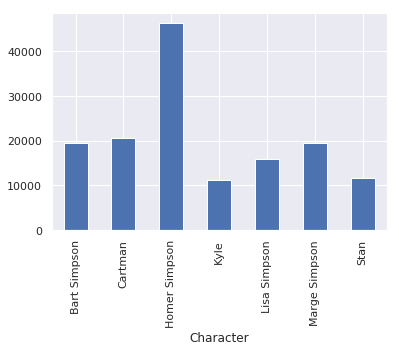

In [63]:
merged_series.groupby('Character').count().plot.bar(legend = False)

In [ ]:
merged_series.groupby('Character').count().plot.bar()